<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/Oct21/Tarea21OCt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#The spectra files we will be using had been preprocessed so that they only include quasars with redshift above 2.1
#For more publicily available spectra of all different targets that DESI observe consult https://data.desi.lbl.gov/doc/
#Lets read open one spectra file.
spec_file=fits.open("/content/drive/MyDrive/Cosas ML/coadd-sv3-dark-25956.fits")

In [5]:
#Display the contect of the file, organized in different HDUs. each HDU can be of a different type.
spec_file.info()

Filename: /content/drive/MyDrive/Cosas ML/coadd-sv3-dark-25956.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    219   49R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   6847R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU         8   (2751, 49)   float32   
  5  B_IVAR        1 ImageHDU         8   (2751, 49)   float32   
  6  B_MASK        1 ImageHDU        10   (2751, 49)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU         9   (2751, 11, 49)   float32   
  8  R_WAVELENGTH    1 ImageHDU        10   (2326,) 

In [6]:
#The FIBERMAP HDU contains information about the object that was observed,
# in particular we will be interested in the TARGETID, the unique identifier
# assigned to each object observed in DESI

fibermap=Table(spec_file["FIBERMAP"].data)
fibermap

TARGETID,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX
int64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32
39627776315097634,0,218.52424978650916,-0.5708880487743447,0.0,0.0,2015.5,262148,1,TGT,0.6786714935367465,1,9010,2186m005,328362,546,PSF,0.038301565,2.1088462,2.6753373,3.0280137,6.1234255,8.722145,638.51776,192.55594,83.18806,2.96911,0.6273142,1.6395667,2.079997,2.3541927,1.6395754,2.0800092,2.3542047,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.52424978650916,-0.5708880487743447,7,5968.394,4,4,-0.0035714286,0.0043915506,-0.0028571428,0.005732115,218.5242362522236,0.03474935,-0.570876468972911,0.07156216,0.789
39627770271109740,0,218.44895797439506,-0.719380644742242,0.0,0.0,2015.5,262148,1,TGT,0.8617445200003712,1,9010,2183m007,326921,4716,PSF,0.038511276,1.8675007,2.2263274,1.7445359,4.1686535,5.4304776,1080.8403,643.4569,74.2835,3.3928757,0.7213921,1.4534671,1.7327403,1.3577642,1.4534671,1.7327403,1.3577642,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.44895797439506,-0.719380644742242,7,6376.1396,5,5,-0.005,0.0077551827,-0.003,0.0067717903,218.4489392177955,0.07953809,-0.7193684246118572,0.08681177,0.789
39627770271109663,0,218.44489778234856,-0.6503627954768026,0.0,0.0,2015.5,262148,1,TGT,0.6862554823098777,1,9010,2183m007,326921,4639,PSF,0.03767091,0.9389951,1.5217457,2.1123633,4.973551,7.649223,1709.9951,657.91705,129.35243,3.182526,0.6444316,0.73003054,1.1830955,1.6422768,0.7300333,1.1831069,1.6423012,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.44489778234856,-0.6503627954768026,2,1641.9678,1,1,-0.007,0.007,0.003,0.003,218.4448717597359,0.0,-0.650374501195604,0.0,0.789
39627770271107659,0,218.3599421015996,-0.7847012179461395,0.0,0.0,2015.5,1179714,1,TGT,0.7512892596631447,1,9010,2183m007,326921,2635,REX,0.044287086,0.340597,0.39200372,0.51483154,3.026456,5.6512446,640.03625,299.1042,63.7238,3.2205527,0.67119694,0.2123443,0.24439368,0.32097036,0.21235447,0.24442847,0.32104084,0,1.0,0.33836335,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103100,9,1179714,0,0,0,0,0,0,218.3599421015996,-0.7847012179461395,3,2093.9639,1,1,0.001,0.001,-0.004,0.004,218.3599457913388,0.0,-0.7846852779973815,3.996803e-13,0.77981704
39627770271108753,0,218.4061716317348,-0.6684951821184881,0.0,0.0,2015.5,1179714,1,TGT,0.6726693674048274,1,9010,2183m007,326921,3729,REX,0.038801994,1.3429354,1.497762,2.075864,14.70572,18.051325,1067.2585,443.66803,67.02692,2.9109225,0.6239691,0.90932155,1.0141568,1.4055984,0.90932155,1.0141568,1.4055984,0,1.0,0.26051852,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103100,9,1179714,0,0,0,0,0,0,218.4061716317348,-0.6684951821184881,3,2093.9639,1,1,-0.003,0.003,-0.005,0.005,218.40616018510846,0.0,-0.6684750931668034,3.996803e-13,0.7834136
39627764227118638,0,218.2220149915

In [7]:
#As can be seen in the table, we have spectra of 49 quasars.

In [8]:
#Lets save the TARGETIDs into one variable for future use
tids=fibermap["TARGETID"]

In [9]:
#Now, the spectra DESI observed for each quasar, i.e. for a given targetid,
#is saved in HDUs named  B_FLUX, R_FLUX, Z_FLUX.
#And the Wavelenght grids are in B_WAVELENGTH,B_WAVELENGTH,Z_WAVELENGTH HDUs respectively.
# B,R,Z correspond to the different bands of the DESI spectrographs.
# Lets access to the spectra, only b band for now,  and plot it.
bwave = spec_file["B_WAVELENGTH"].data
bflux = spec_file["B_FLUX"].data

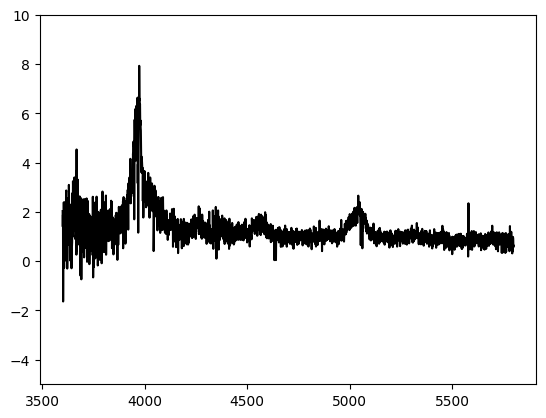

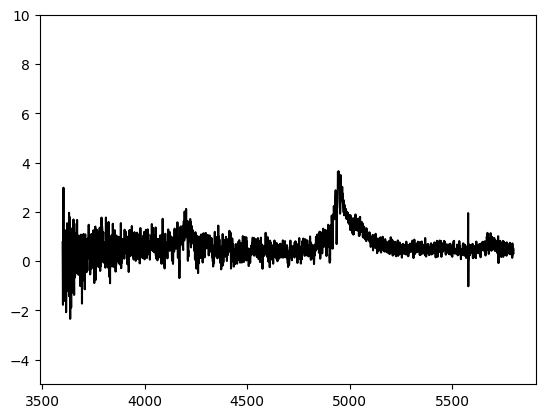

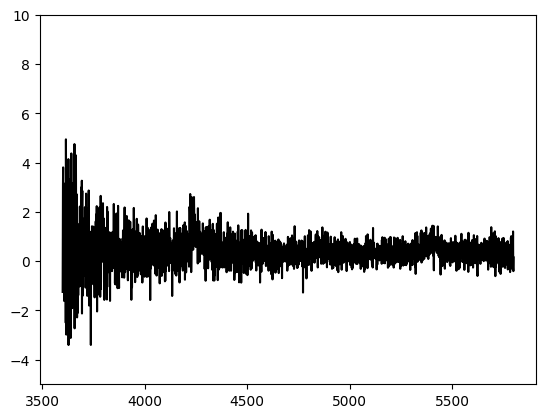

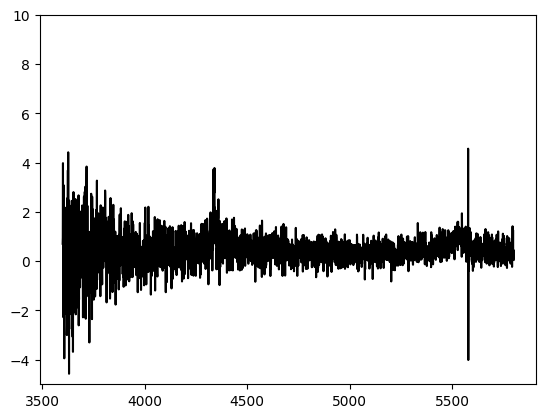

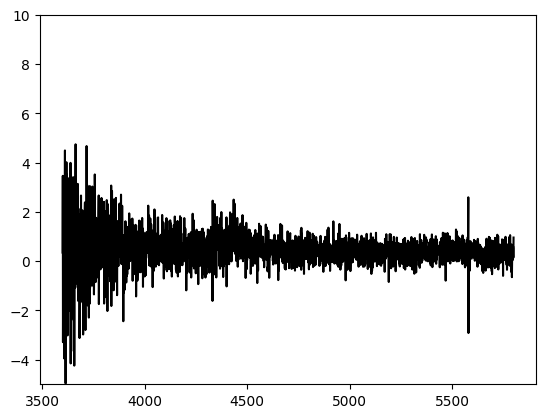

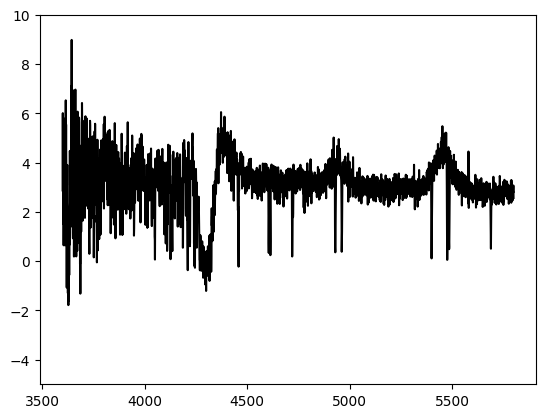

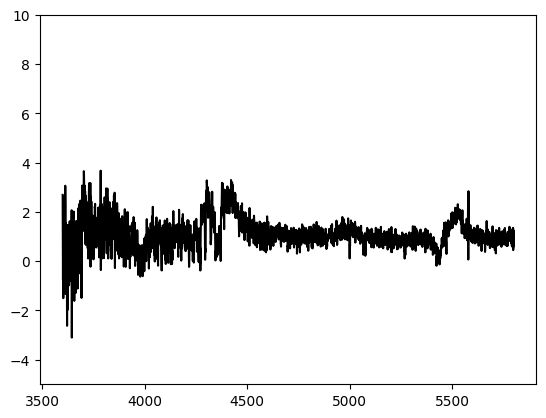

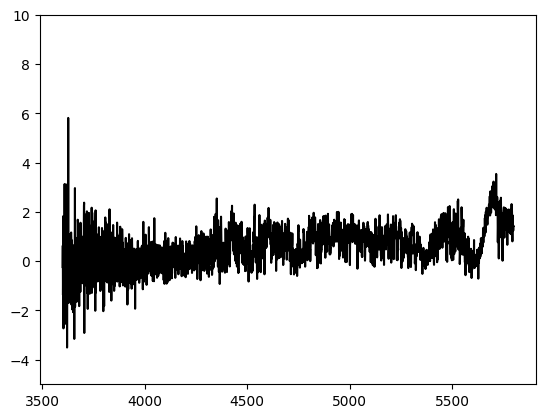

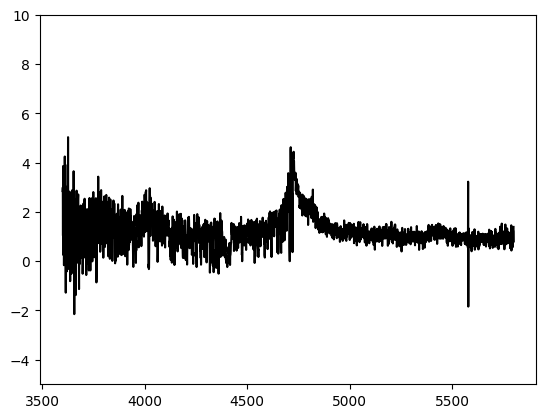

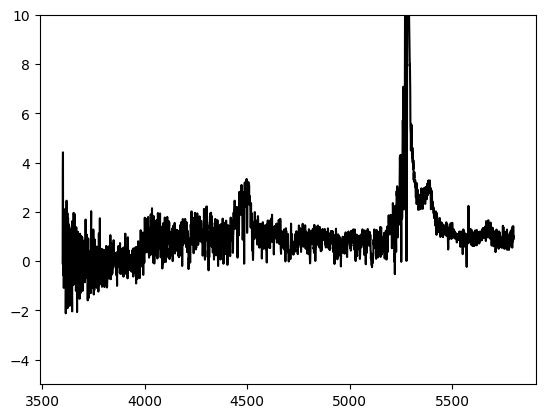

In [10]:
#Lets plot the first 10 spectra
for i in range(10):
  plt.plot(bwave,bflux[i],'k')
  plt.ylim(-5,10)
  plt.show()

Exercise: Use the PCA analysis to find the principal components that corresponds for the spectra we have. Do it first for the spectra in only one file, then combine the data from different files and make the PCA again.

PCA para archivo coadd-sv3-dark-25956.fits


In [11]:
#Se puede calcular los eingevalores con el paquete de sklearn

In [12]:
bwave

array([3600. , 3600.8, 3601.6, ..., 5798.4, 5799.2, 5800. ])

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(bflux)
evals = pca.explained_variance_ratio_
evals_cs = evals.cumsum()

In [14]:
evecs = pca.components_

In [15]:
# Para encontrar el coeficiente de uno en particular
flux_mean = bflux.mean(0)
flu = bflux[0]
coeff = np.dot(evecs, flu - flux_mean)

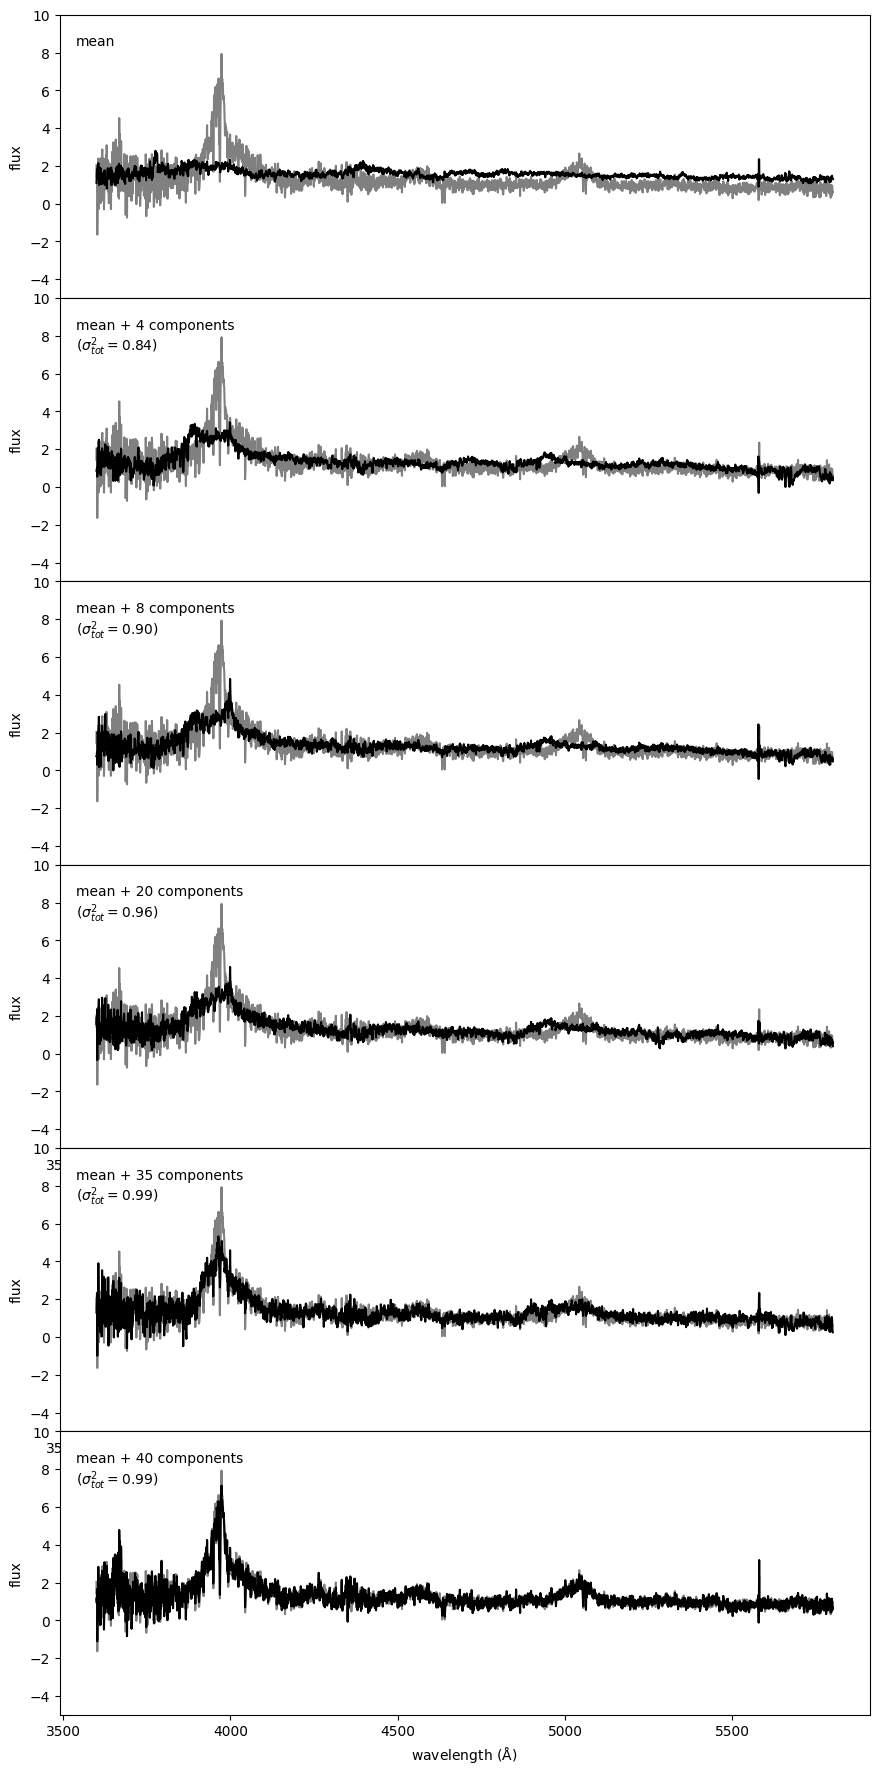

In [16]:
fig = plt.figure(figsize=(10, 20))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i, n in enumerate([0, 4, 8, 20, 35, 40]):
    ax = fig.add_subplot(611 + i)
    ax.plot(bwave, flu, '-', c='gray')
    ax.plot(bwave, flux_mean + np.dot(coeff[:n], evecs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-5, 10)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

Generalización para PCA y archivo coadd-sv3-dark-25971.fits

In [17]:
spec_file2=fits.open("/content/drive/MyDrive/Cosas ML/coadd-sv3-dark-25971.fits")

In [18]:
def Wave_Flux(File):
  spec_file = File
  fibermap = Table(spec_file["FIBERMAP"].data)
  tids=fibermap["TARGETID"]
  bwave = spec_file["B_WAVELENGTH"].data
  bflux = spec_file["B_FLUX"].data

  return bwave,bflux, tids

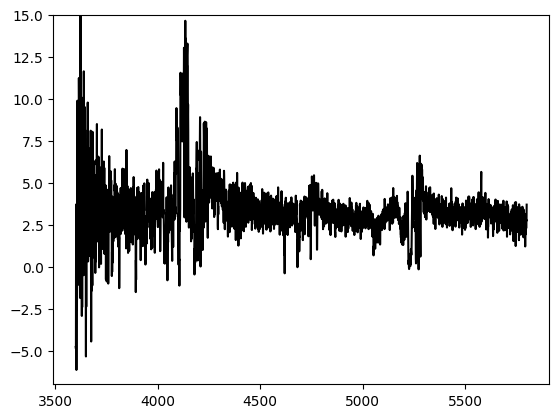

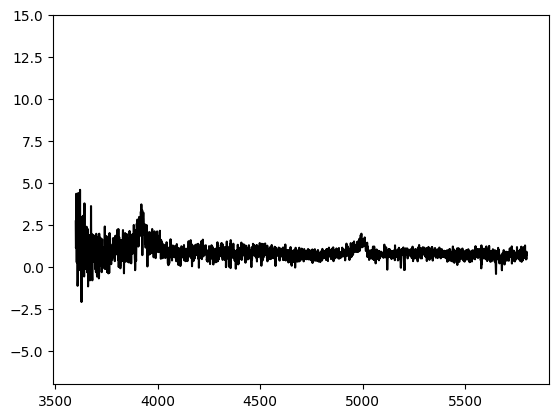

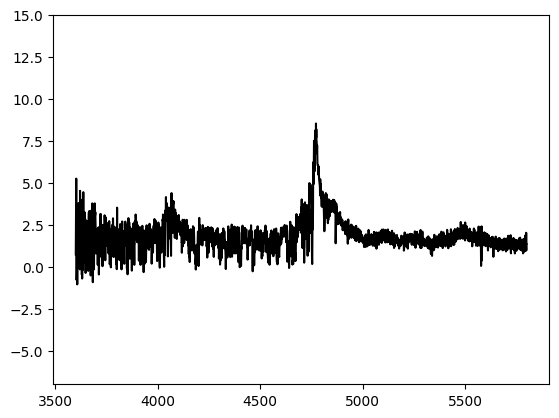

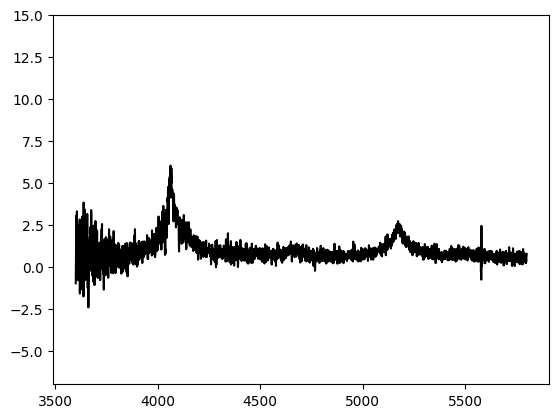

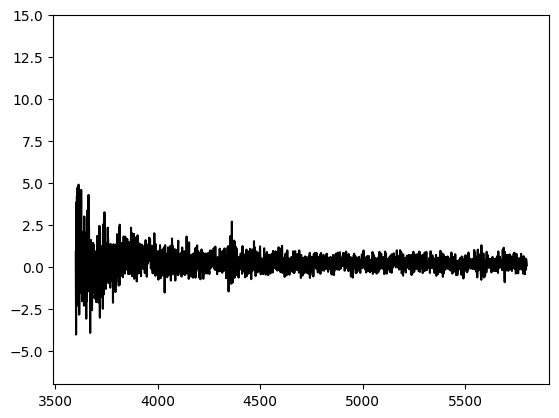

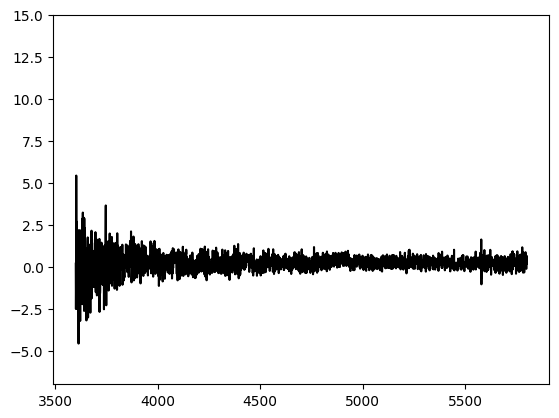

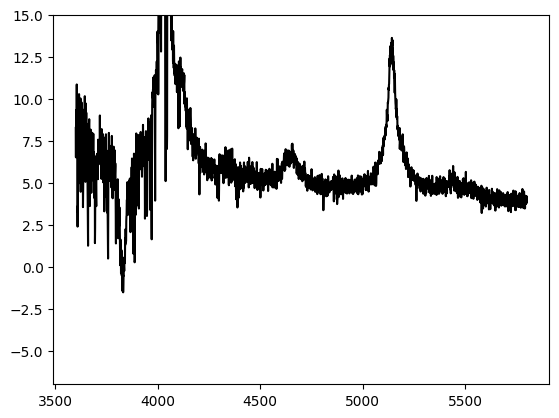

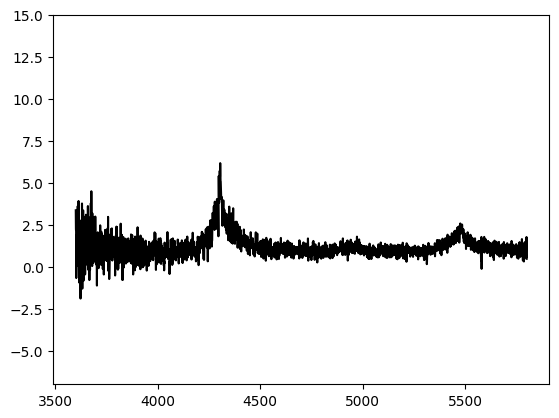

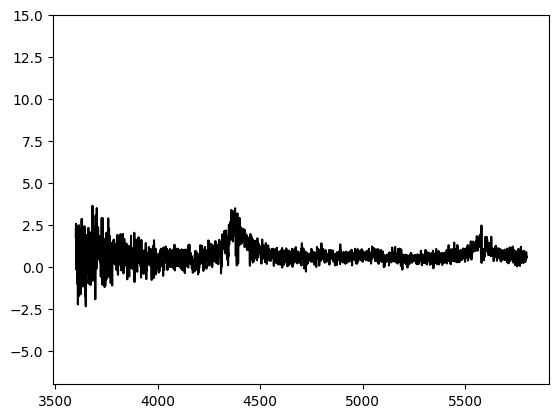

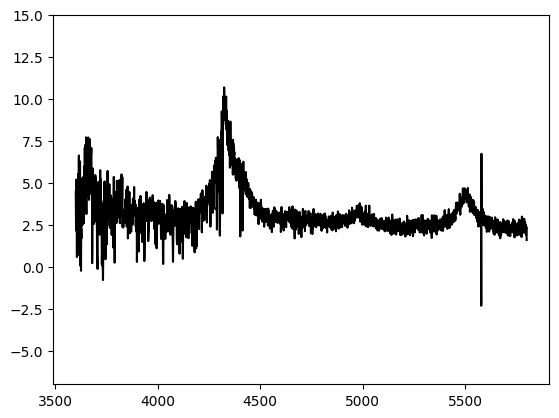

In [19]:
Bwave2,Bflux2,_=Wave_Flux(fits.open("/content/drive/MyDrive/Cosas ML/coadd-sv3-dark-25971.fits"))
for i in range(10):
  plt.plot(Bwave2,Bflux2[i],'k')
  plt.ylim(-7,15)
  plt.show()

In [20]:
def PCA1(bwave,bflux):
  pca = PCA()
  pca.fit(bflux)
  evals = pca.explained_variance_ratio_
  evals_cs = evals.cumsum()
  evecs = pca.components_

  flux_mean = bflux.mean(0)
  flu = bflux[0]
  coeff = np.dot(evecs, flu - flux_mean)

  fig = plt.figure(figsize=(10, 20))
  fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

  for i, n in enumerate([0, 4, 8, 20, 35, 40]):
      ax = fig.add_subplot(611 + i)
      ax.plot(bwave, flu, '-', c='gray')
      ax.plot(bwave, flux_mean + np.dot(coeff[:n], evecs[:n]), '-k')

      if i < 3:
          ax.xaxis.set_major_formatter(plt.NullFormatter())

      ax.set_ylim(-7, 15)
      ax.set_ylabel('flux')

      if n == 0:
          text = "mean"
      elif n == 1:
          text = "mean + 1 component\n"
          text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
      else:
          text = "mean + %i components\n" % n
          text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

      ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

  fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
  plt.show()

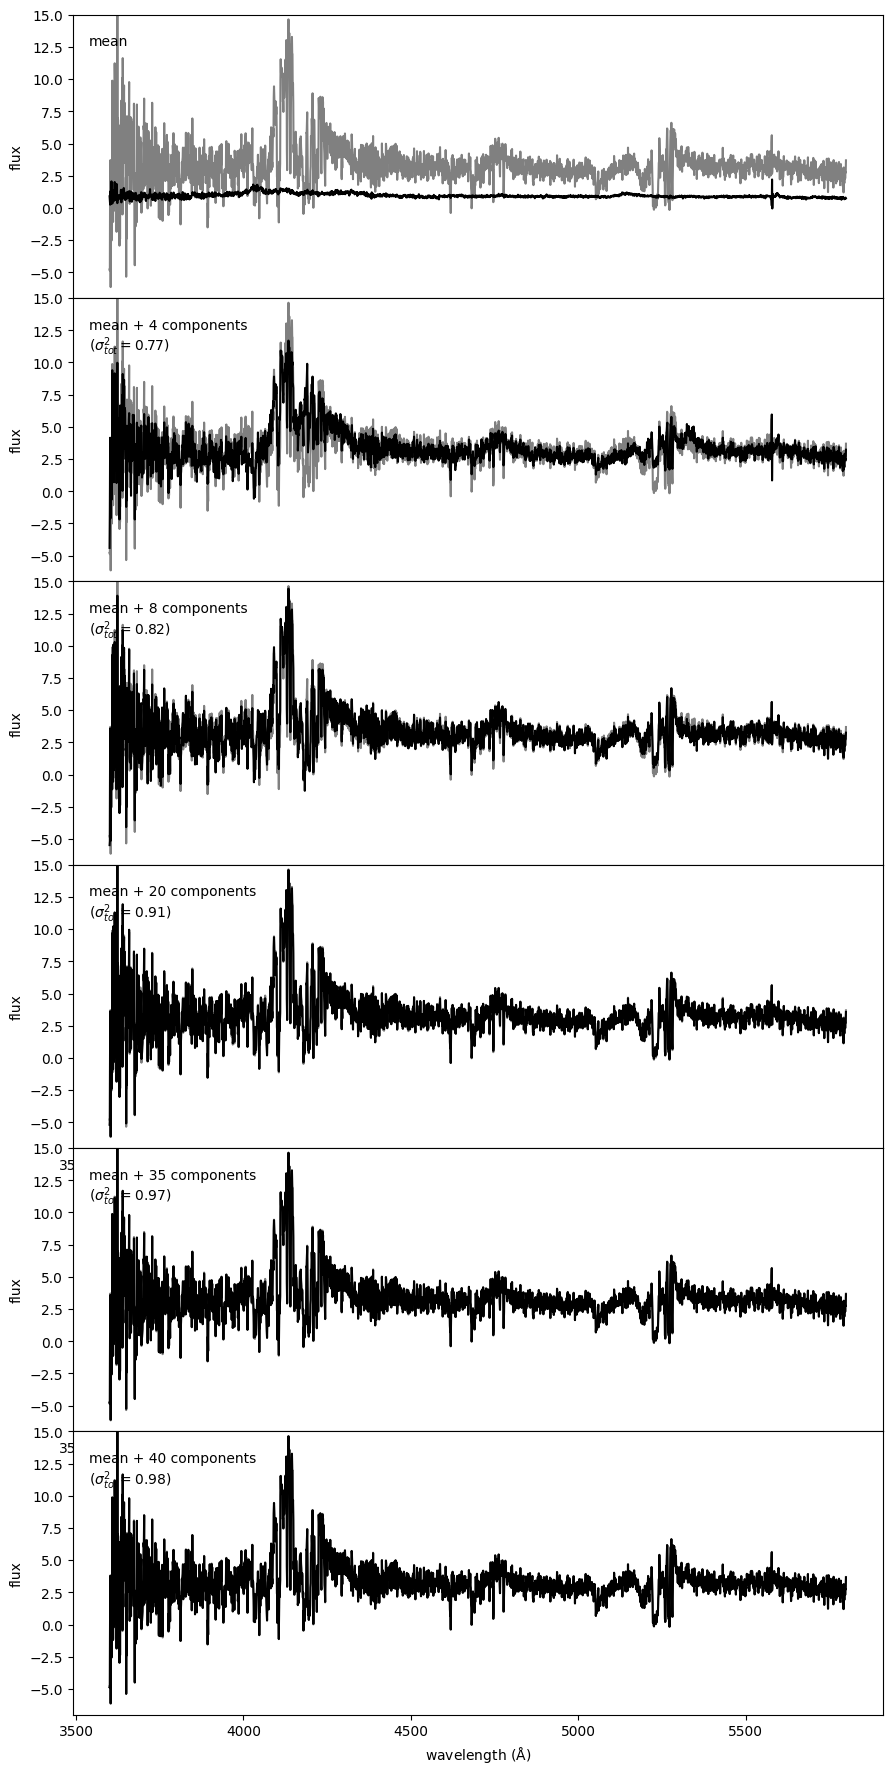

In [21]:
PCA1(Bwave2,Bflux2)

Combinación de distintos archivos

In [22]:
#Concatenaremos las distintas bfluxes de los distintos archivos
Bwave,Bflux, _=Wave_Flux(fits.open("/content/drive/MyDrive/Cosas ML/coadd-sv3-dark-25956.fits"))
Bwave2,Bflux2, _=Wave_Flux(fits.open("/content/drive/MyDrive/Cosas ML/coadd-sv3-dark-25971.fits"))
Bwave3,Bflux3,_=Wave_Flux(fits.open("/content/drive/MyDrive/Cosas ML/coadd-sv3-dark-9930.fits"))
Bwave4,Bflux4,_=Wave_Flux(fits.open("/content/drive/MyDrive/Cosas ML/coadd-sv3-dark-25965.fits"))


In [23]:
np.shape(Bwave4)

(2751,)

In [24]:
BfluxC = np.concatenate((Bflux, Bflux2, Bflux3,Bflux4), axis=0)

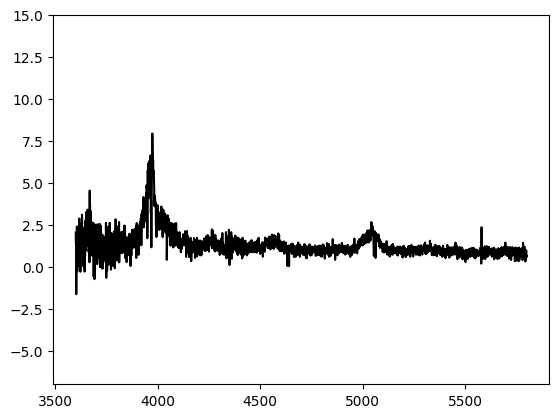

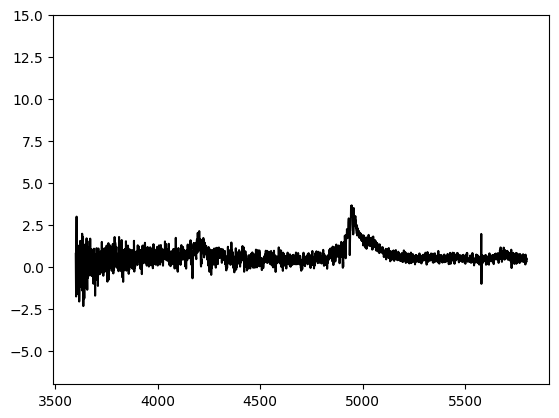

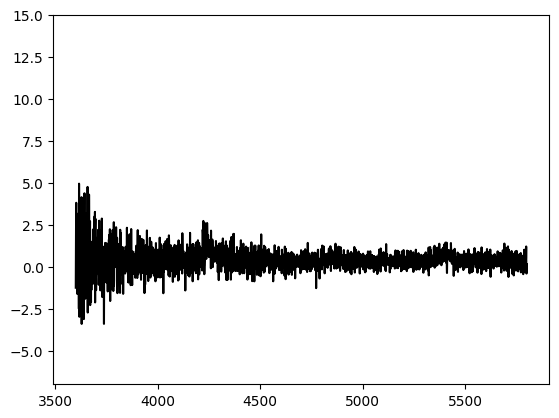

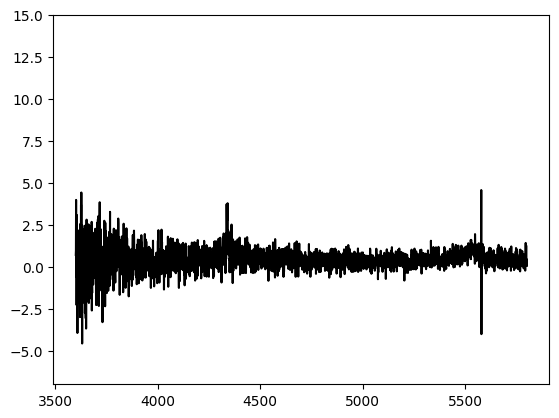

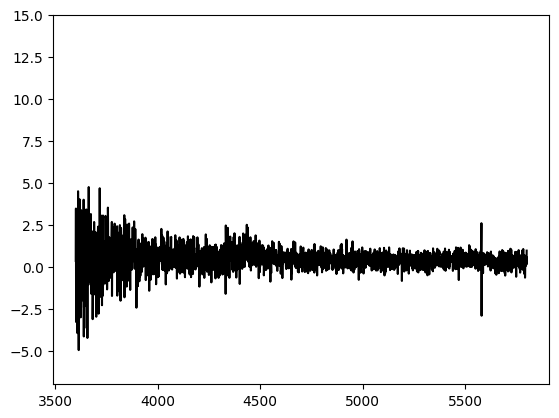

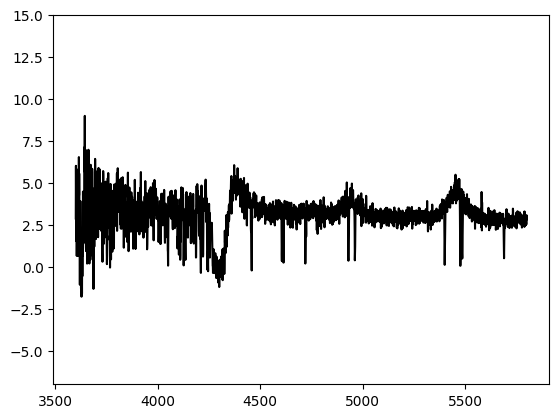

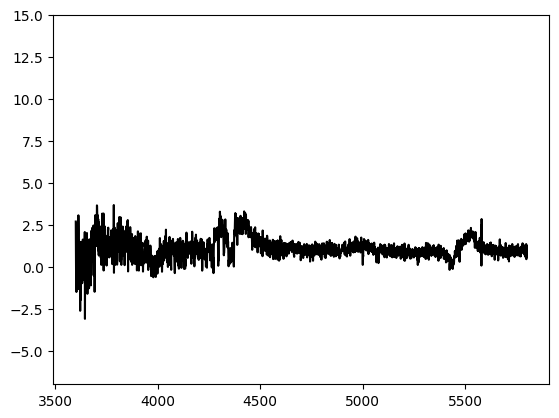

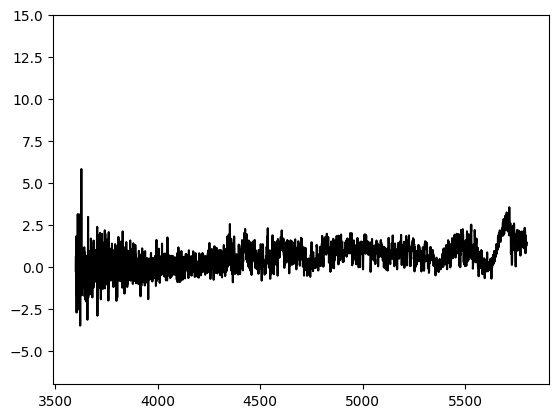

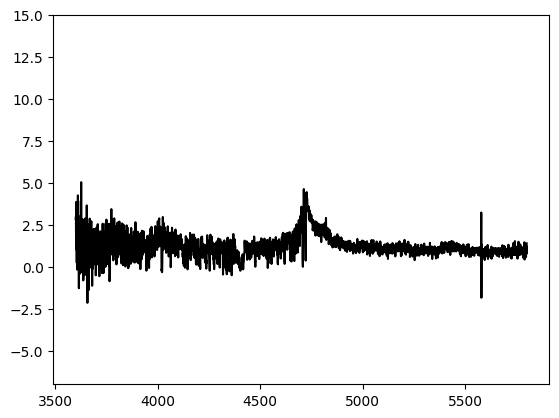

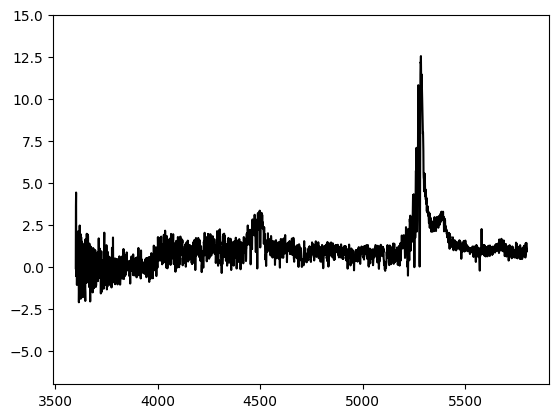

In [25]:
for i in range(10):
  plt.plot(Bwave2,BfluxC[i],'k')
  plt.ylim(-7,15)
  plt.show()

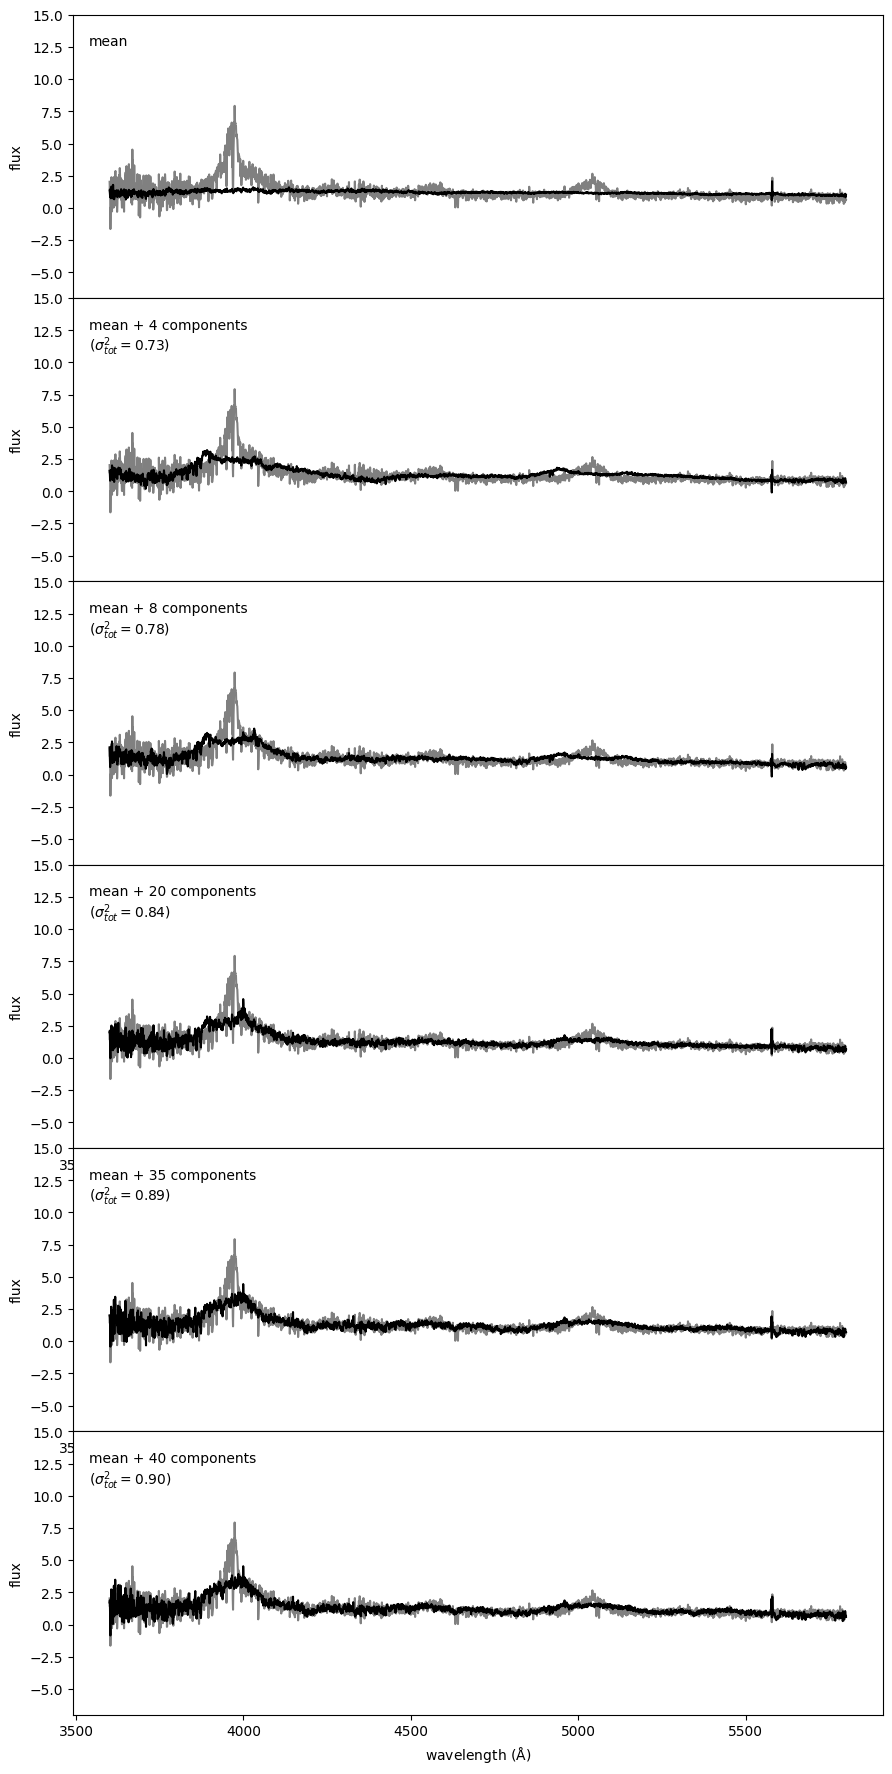

In [26]:
PCA1(Bwave,BfluxC)

Parte 2

In [27]:
fibermap=Table(spec_file["FIBERMAP"].data)
fibermap

TARGETID,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX
int64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32
39627776315097634,0,218.52424978650916,-0.5708880487743447,0.0,0.0,2015.5,262148,1,TGT,0.6786714935367465,1,9010,2186m005,328362,546,PSF,0.038301565,2.1088462,2.6753373,3.0280137,6.1234255,8.722145,638.51776,192.55594,83.18806,2.96911,0.6273142,1.6395667,2.079997,2.3541927,1.6395754,2.0800092,2.3542047,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.52424978650916,-0.5708880487743447,7,5968.394,4,4,-0.0035714286,0.0043915506,-0.0028571428,0.005732115,218.5242362522236,0.03474935,-0.570876468972911,0.07156216,0.789
39627770271109740,0,218.44895797439506,-0.719380644742242,0.0,0.0,2015.5,262148,1,TGT,0.8617445200003712,1,9010,2183m007,326921,4716,PSF,0.038511276,1.8675007,2.2263274,1.7445359,4.1686535,5.4304776,1080.8403,643.4569,74.2835,3.3928757,0.7213921,1.4534671,1.7327403,1.3577642,1.4534671,1.7327403,1.3577642,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.44895797439506,-0.719380644742242,7,6376.1396,5,5,-0.005,0.0077551827,-0.003,0.0067717903,218.4489392177955,0.07953809,-0.7193684246118572,0.08681177,0.789
39627770271109663,0,218.44489778234856,-0.6503627954768026,0.0,0.0,2015.5,262148,1,TGT,0.6862554823098777,1,9010,2183m007,326921,4639,PSF,0.03767091,0.9389951,1.5217457,2.1123633,4.973551,7.649223,1709.9951,657.91705,129.35243,3.182526,0.6444316,0.73003054,1.1830955,1.6422768,0.7300333,1.1831069,1.6423012,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.44489778234856,-0.6503627954768026,2,1641.9678,1,1,-0.007,0.007,0.003,0.003,218.4448717597359,0.0,-0.650374501195604,0.0,0.789
39627770271107659,0,218.3599421015996,-0.7847012179461395,0.0,0.0,2015.5,1179714,1,TGT,0.7512892596631447,1,9010,2183m007,326921,2635,REX,0.044287086,0.340597,0.39200372,0.51483154,3.026456,5.6512446,640.03625,299.1042,63.7238,3.2205527,0.67119694,0.2123443,0.24439368,0.32097036,0.21235447,0.24442847,0.32104084,0,1.0,0.33836335,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103100,9,1179714,0,0,0,0,0,0,218.3599421015996,-0.7847012179461395,3,2093.9639,1,1,0.001,0.001,-0.004,0.004,218.3599457913388,0.0,-0.7846852779973815,3.996803e-13,0.77981704
39627770271108753,0,218.4061716317348,-0.6684951821184881,0.0,0.0,2015.5,1179714,1,TGT,0.6726693674048274,1,9010,2183m007,326921,3729,REX,0.038801994,1.3429354,1.497762,2.075864,14.70572,18.051325,1067.2585,443.66803,67.02692,2.9109225,0.6239691,0.90932155,1.0141568,1.4055984,0.90932155,1.0141568,1.4055984,0,1.0,0.26051852,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103100,9,1179714,0,0,0,0,0,0,218.4061716317348,-0.6684951821184881,3,2093.9639,1,1,-0.003,0.003,-0.005,0.005,218.40616018510846,0.0,-0.6684750931668034,3.996803e-13,0.7834136
39627764227118638,0,218.2220149915

In [28]:
# In principle all these spectra corresponds to quasar spectra and redshift above 1.8,
# however we need to read one more table to know the redshift that DESI measured for each of the objects we have.

In [29]:
#In this case we will read the redshift catalog as a table directly.
zcat=Table.read("/content/drive/MyDrive/Cosas ML/zall-pix-edr-vac.fits",hdu=1)
#Display the redshift catalog.
zcat

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY,MIN_MJD,MEAN_MJD,MAX_MJD,FIRSTNIGHT,LASTNIGHT
int64,bytes7,bytes6,int32,int32,float64,float64,int64,float64,float64[10],int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bool,int64,bool,float64,float64,float64,int32,int32
39628473198708395,cmx,other,2154,2154,-0.0019956912923479522,4.1311493573349107e-48,1570,8.999999999999996e+99,0.0 .. 0.0,0,STAR,CV,3,1.942668892225729e+84,512,23.661967677367254,29.84758879289675,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.3743222091683128,7,9010,--,494512,1707,DEV,0.056008916,0.8742358,4.4879527,14.53286,40.183647,23.470558,846.09424,161.24467,27.071745,-1.0,-1.0,0.30432662,1.5622828,5.0589743,0.30432662,1.5622828,5.0589743,0,4.0,1.4857041,-0.47312373,0.34610084,0,--,0.0,0.0,0.0,0.0,S,3200,1,9007199254742016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.661967677367254,29.84758879289675,0,0.0,0,0,0.0,0.0,0.0,0.0,23.6619676773673,0.0,29.8475887928968,0.0,0.7702122,334.5758,0.23833227,63.154266,251.84634,1200.8414,489.7509,6.6365247,1.7938427,29931.836,67.48044,5253.2964,0.107736714,5998.398,33749.49,20.86845,95.85028,4.4280867e-05,226.88919,8.178434e-06,0.0,9751.99,5.995135e-05,48.05161,102.743744,30266.412,294.60797,5316.4507,251.95409,16951.23,34239.24,75.55658,200.38788,0,False,1,True,59200.06640136,59200.095110124996,59200.12381137,20201216,20201216
39628473198709499,cmx,other,2154,2154,0.797663336968385,6.764807540963103e-05,0,8562.711500316858,173.84545793773444 .. 3.5471443000513863,7928,GALAXY,--,10,1111.0357974395156,0,23.711764237454403,29.843726508418328,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.6556303597015493,7,9010,--,494512,2811,DEV,0.055015083,0.37260255,2.0997107,11.454535,42

In [30]:
#From the zcat table, the most important thing we will use is the TARGETID, the SURVEY, the SPECTYPE and the redshift Z.
#Lets reduce the table to just these variables.
zcat=zcat['TARGETID','SURVEY','SPECTYPE','Z']
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
39628473198708395,cmx,STAR,-0.0019956912923479522
39628473198709499,cmx,GALAXY,0.797663336968385
39628473198710139,cmx,GALAXY,1.33150513847107
39628473198710603,cmx,GALAXY,0.804205874112604
39628473198711006,cmx,STAR,-6.607473910190775e-05
39628473198711342,cmx,STAR,-0.0019956912923479522
39628473198711925,cmx,GALAXY,0.39072440164450306
39628473202901028,cmx,GALAXY,0.6657999257489294
39628473202901626,cmx,GALAXY,0.32842015807005115


In [31]:
#Now lets reduce the table to contain only the elements for which the TARGETIDs that we identified in our spectra file are present
#For this we need to know that such files correspond to the SURVEY=sv3 (as indicated in the filename)
#So, lets make first a filter for sv3
mask=zcat["SURVEY"]=='sv3'
zcat=zcat[mask]
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
616088497761027054,sv3,GALAXY,0.8047145429076951
616088497765221242,sv3,STAR,-0.0019956912923479522
616088497765221281,sv3,GALAXY,0.5507557262875663
616088497765221450,sv3,GALAXY,0.07358486749516376
616088497765221501,sv3,GALAXY,0.719444701817346
616088497769415698,sv3,GALAXY,0.039215908005138314
616088497773610181,sv3,GALAXY,0.2864062436603106
616088497819747217,sv3,GALAXY,0.4960341488452893
616088497819747383,sv3,GALAXY,1.0968576187793935


In [32]:
#Now lets keep only the elements corresponding to the TARGETIDS we have in the spectrafile
mask=np.in1d(zcat["TARGETID"],tids)
zcat=zcat[mask]
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
39627764218727224,sv3,QSO,2.1370347911252843
39627764222919195,sv3,QSO,2.5460148518383536
39627764222919677,sv3,QSO,2.5116209374418137
39627764222921791,sv3,QSO,2.1421198094951523
39627764222924517,sv3,QSO,2.2851727866116023
39627764227118438,sv3,QSO,3.630129643577127
39627764227118638,sv3,QSO,2.540430344832981
39627770258523079,sv3,QSO,1.5479191017583473
39627770258526411,sv3,QSO,2.470417839489763


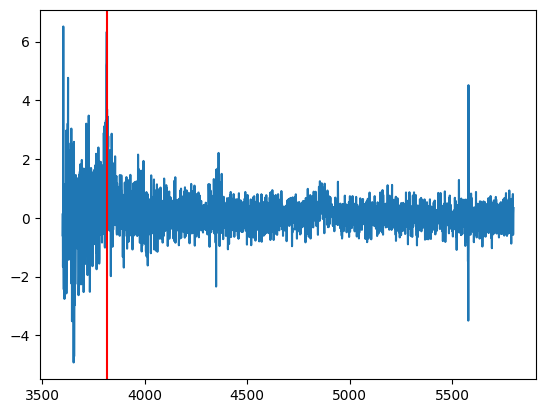

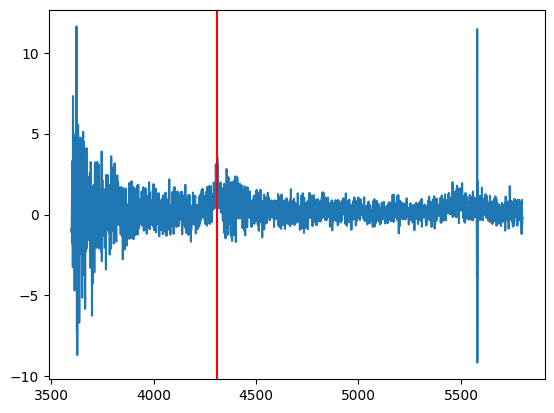

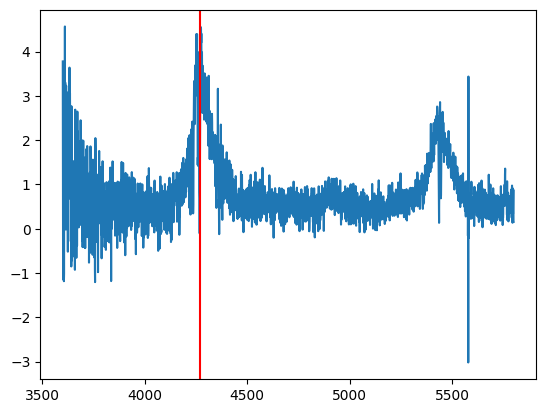

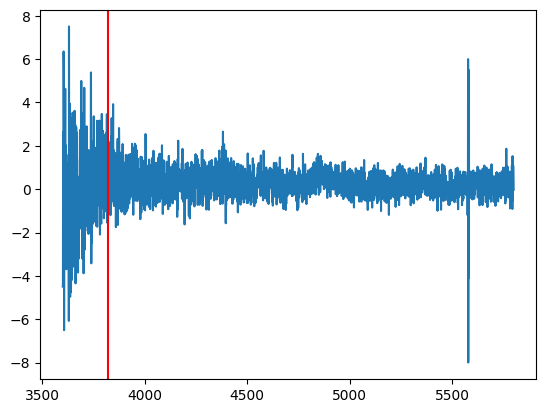

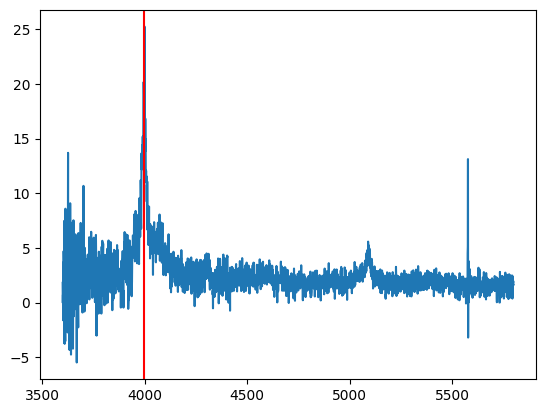

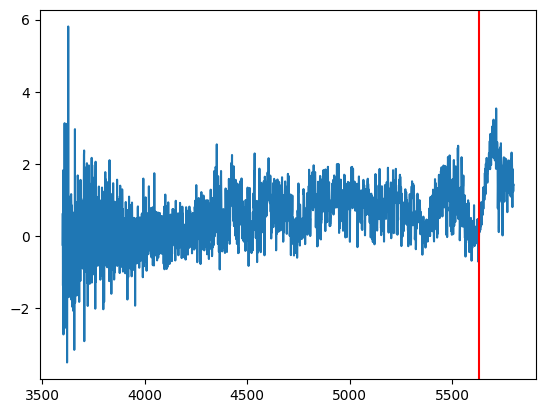

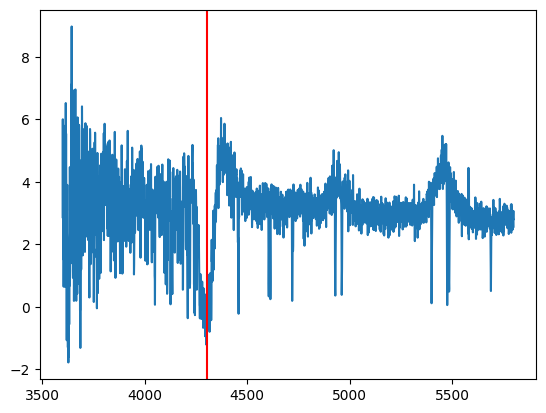

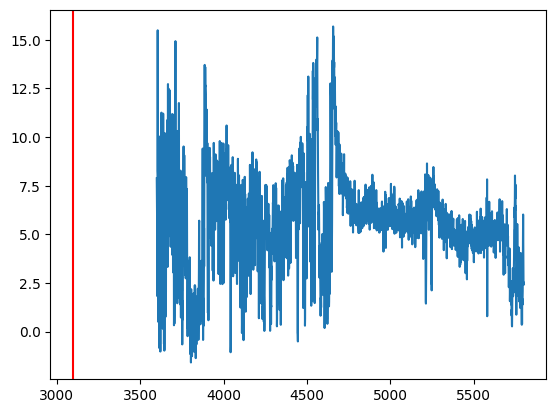

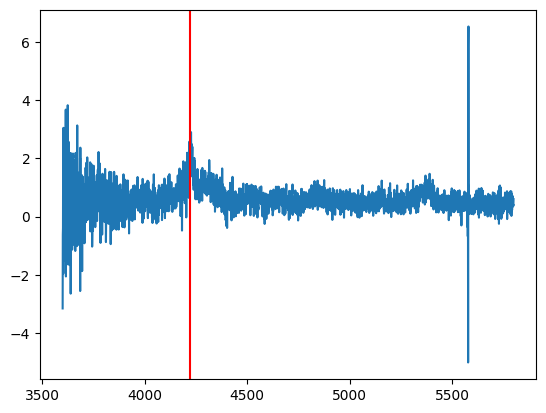

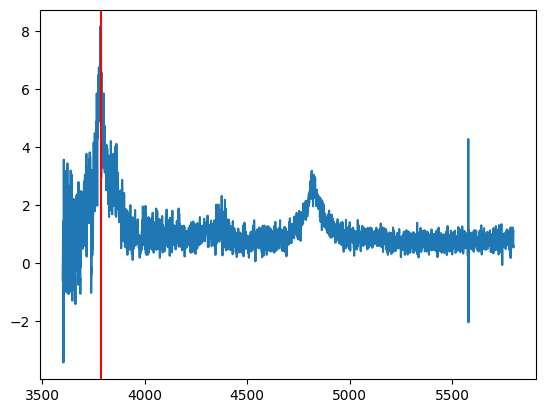

In [33]:
#As we can see we have now a table with only 49 elements, and most of the spectype is of the QSO kind.
#So now we now for a given TARGETID what is the corresponding redshift of the Quasar
# Now lets see if there is agrrement, by ploting the possition of the Lyman-alpha emission
# line for the first 10 elements in the catalog

lya=1216

for i,tid in enumerate(zcat["TARGETID"][:10]):
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(bwave,bflux[indx])
  plt.axvline(1216*(1+z),color='r')
  plt.show()

In [34]:
#We can see in most of the cases the position of the redline, which is the expected position of the Lya emission line
#match very well with the position of a strong emission line in the data. So we are confident that we are matching correctly
#the spectra with the quasar redshift.

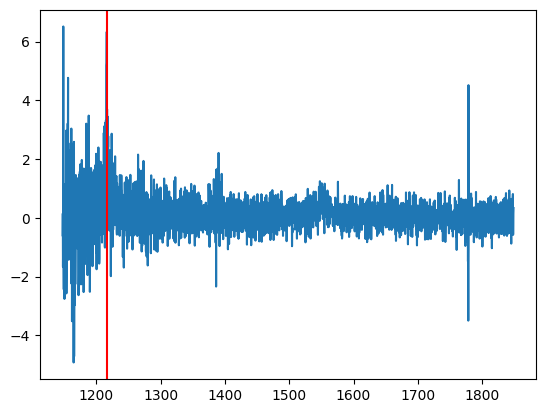

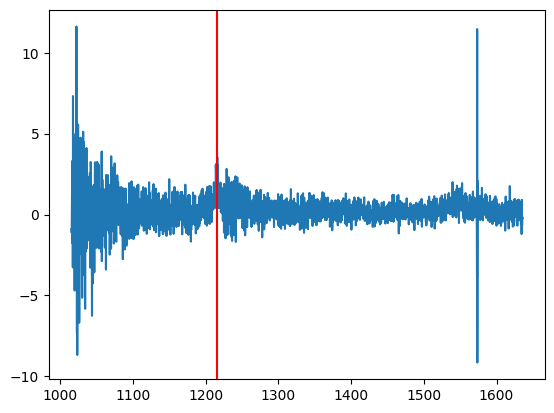

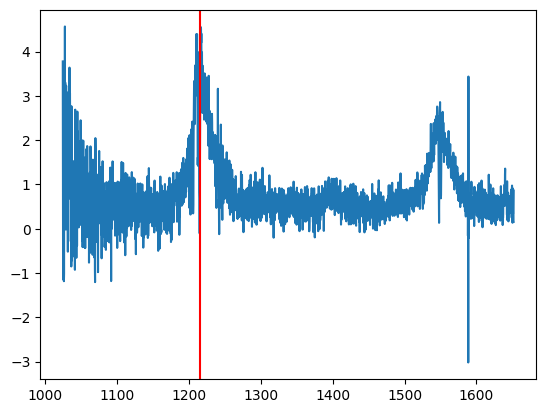

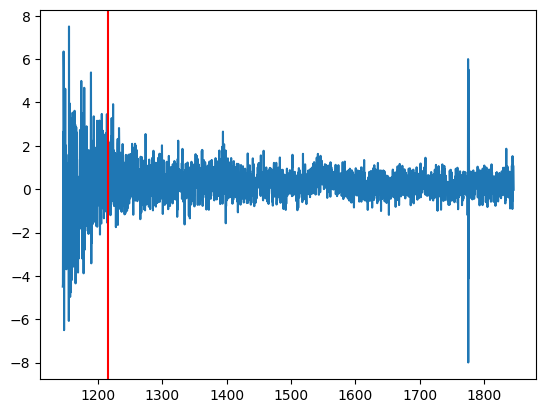

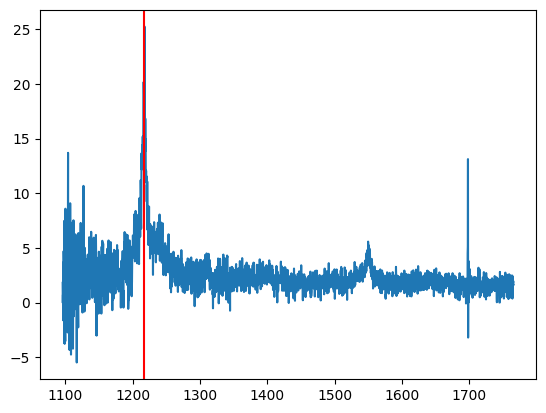

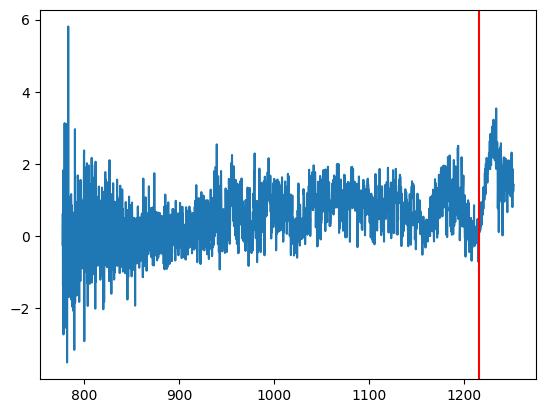

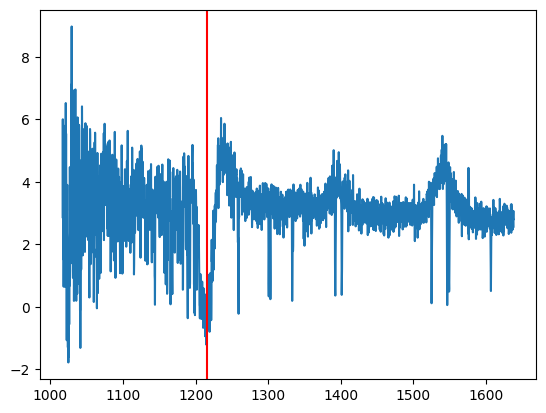

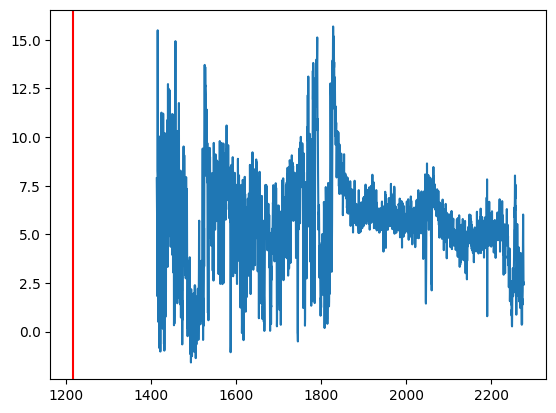

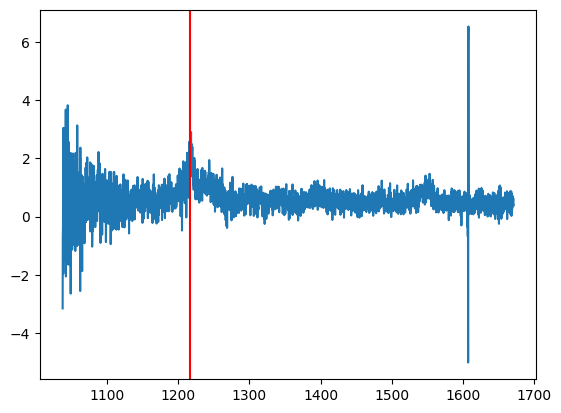

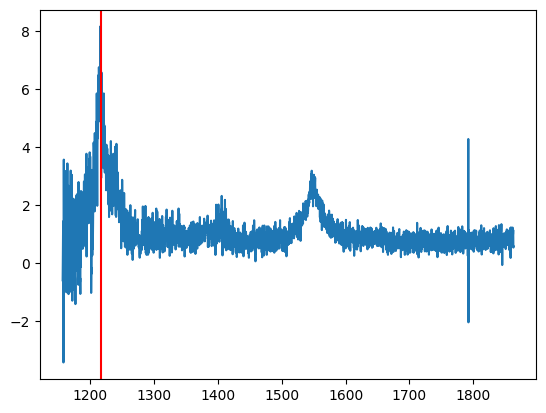

In [35]:
#No we can convert our spectra from the observed frame to restframe, to do so we need to convert the wavelentgh array
#for each of the spectra to the observed frame using the redhisft.
#Again, here is an example for the first ten spectra

lya=1216

for i,tid in enumerate(zcat["TARGETID"][:10]):
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(bwave/(1+z),bflux[indx])
  plt.axvline(1216,color='red')
  plt.show()

Excersise: Now that you can convert the spectra to the rest frame,
create a wavelength array in the rest frame that is common for all the spectra, and interpolate de spectra in such array. So that all your spectra have the same wavelenght array as before and you can apply now the PCA analysis.

In [36]:
_ , _, tids=Wave_Flux(fits.open("/content/drive/MyDrive/Cosas ML/coadd-sv3-dark-25956.fits"))
_,_,tids1=Wave_Flux(fits.open("/content/drive/MyDrive/Cosas ML/coadd-sv3-dark-25971.fits"))
_,_,tids2=Wave_Flux(fits.open("/content/drive/MyDrive/Cosas ML/coadd-sv3-dark-9930.fits"))
_,_,tids3=Wave_Flux(fits.open("/content/drive/MyDrive/Cosas ML/coadd-sv3-dark-25965.fits"))

In [37]:
zcat=Table.read("/content/drive/MyDrive/Cosas ML/zall-pix-edr-vac.fits",hdu=1)

In [38]:
zcat=zcat['TARGETID','SURVEY','SPECTYPE','Z']

In [39]:
mask=zcat["SURVEY"]=='sv3'
zcat=zcat[mask]
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
616088497761027054,sv3,GALAXY,0.8047145429076951
616088497765221242,sv3,STAR,-0.0019956912923479522
616088497765221281,sv3,GALAXY,0.5507557262875663
616088497765221450,sv3,GALAXY,0.07358486749516376
616088497765221501,sv3,GALAXY,0.719444701817346
616088497769415698,sv3,GALAXY,0.039215908005138314
616088497773610181,sv3,GALAXY,0.2864062436603106
616088497819747217,sv3,GALAXY,0.4960341488452893
616088497819747383,sv3,GALAXY,1.0968576187793935


In [40]:
def mascara(tids,zcat):
  mask=np.in1d(zcat["TARGETID"],tids)
  zcat=zcat[mask]
  return zcat

In [41]:
zcat_file = mascara(tids3,zcat)

In [42]:
z_ = zcat_file["Z"][0]

In [43]:
np.mean(Bwave/(1+z_))

1383.1138753771904

In [44]:
Bwave

array([3600. , 3600.8, 3601.6, ..., 5798.4, 5799.2, 5800. ])

In [45]:
bwave_red = Bwave/(1+z_)

In [46]:
inter_Bflux = np.interp(bwave_red,Bwave, Bflux[0])

In [47]:
Bwave

array([3600. , 3600.8, 3601.6, ..., 5798.4, 5799.2, 5800. ])

In [48]:
bwave_red

array([1059.40637263, 1059.64179627, 1059.87721991, ..., 1706.35053085,
       1706.58595449, 1706.82137813])

In [49]:
Bflux

array([[ 2.030466  ,  1.397808  ,  1.8780135 , ...,  0.8924712 ,
         0.5636777 ,  0.6261815 ],
       [ 0.7664587 , -0.34065738, -1.7742102 , ...,  0.5212323 ,
         0.4354403 ,  0.32577294],
       [-1.2527977 ,  1.0195899 ,  3.0779407 , ..., -0.24917708,
        -0.4083957 ,  0.15004046],
       ...,
       [ 1.8033844 , -0.02667289,  0.7129351 , ...,  1.9689511 ,
         1.6319344 ,  1.6191254 ],
       [ 1.5179983 ,  3.484466  ,  5.1383996 , ..., -0.59451395,
        -0.28607354,  0.5998476 ],
       [-4.4953465 , -4.3742943 ,  1.1745545 , ...,  0.67433137,
         0.29812908, -0.02878585]], dtype=float32)

In [50]:
inter_Bflux

array([2.03046608, 2.03046608, 2.03046608, ..., 2.03046608, 2.03046608,
       2.03046608])

In [51]:
np.shape(Bflux)

(49, 2751)

In [52]:
np.zeros(np.shape(Bflux))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
inter = np.zeros(np.shape(Bflux))
for i in range(len(Bflux[:,0])):
  inter_Bflux = np.interp(bwave_red,Bwave, Bflux[i])
  inter[i]=inter_Bflux

In [75]:
inter

array([[ 2.03046608,  2.03046608,  2.03046608, ...,  2.03046608,
         2.03046608,  2.03046608],
       [ 0.76645869,  0.76645869,  0.76645869, ...,  0.76645869,
         0.76645869,  0.76645869],
       [-1.25279772, -1.25279772, -1.25279772, ..., -1.25279772,
        -1.25279772, -1.25279772],
       ...,
       [ 1.80338442,  1.80338442,  1.80338442, ...,  1.80338442,
         1.80338442,  1.80338442],
       [ 1.51799834,  1.51799834,  1.51799834, ...,  1.51799834,
         1.51799834,  1.51799834],
       [-4.49534655, -4.49534655, -4.49534655, ..., -4.49534655,
        -4.49534655, -4.49534655]])

In [79]:
Bflux

array([[ 2.030466  ,  1.397808  ,  1.8780135 , ...,  0.8924712 ,
         0.5636777 ,  0.6261815 ],
       [ 0.7664587 , -0.34065738, -1.7742102 , ...,  0.5212323 ,
         0.4354403 ,  0.32577294],
       [-1.2527977 ,  1.0195899 ,  3.0779407 , ..., -0.24917708,
        -0.4083957 ,  0.15004046],
       ...,
       [ 1.8033844 , -0.02667289,  0.7129351 , ...,  1.9689511 ,
         1.6319344 ,  1.6191254 ],
       [ 1.5179983 ,  3.484466  ,  5.1383996 , ..., -0.59451395,
        -0.28607354,  0.5998476 ],
       [-4.4953465 , -4.3742943 ,  1.1745545 , ...,  0.67433137,
         0.29812908, -0.02878585]], dtype=float32)

In [78]:
bwave_red

array([1059.40637263, 1059.64179627, 1059.87721991, ..., 1706.35053085,
       1706.58595449, 1706.82137813])

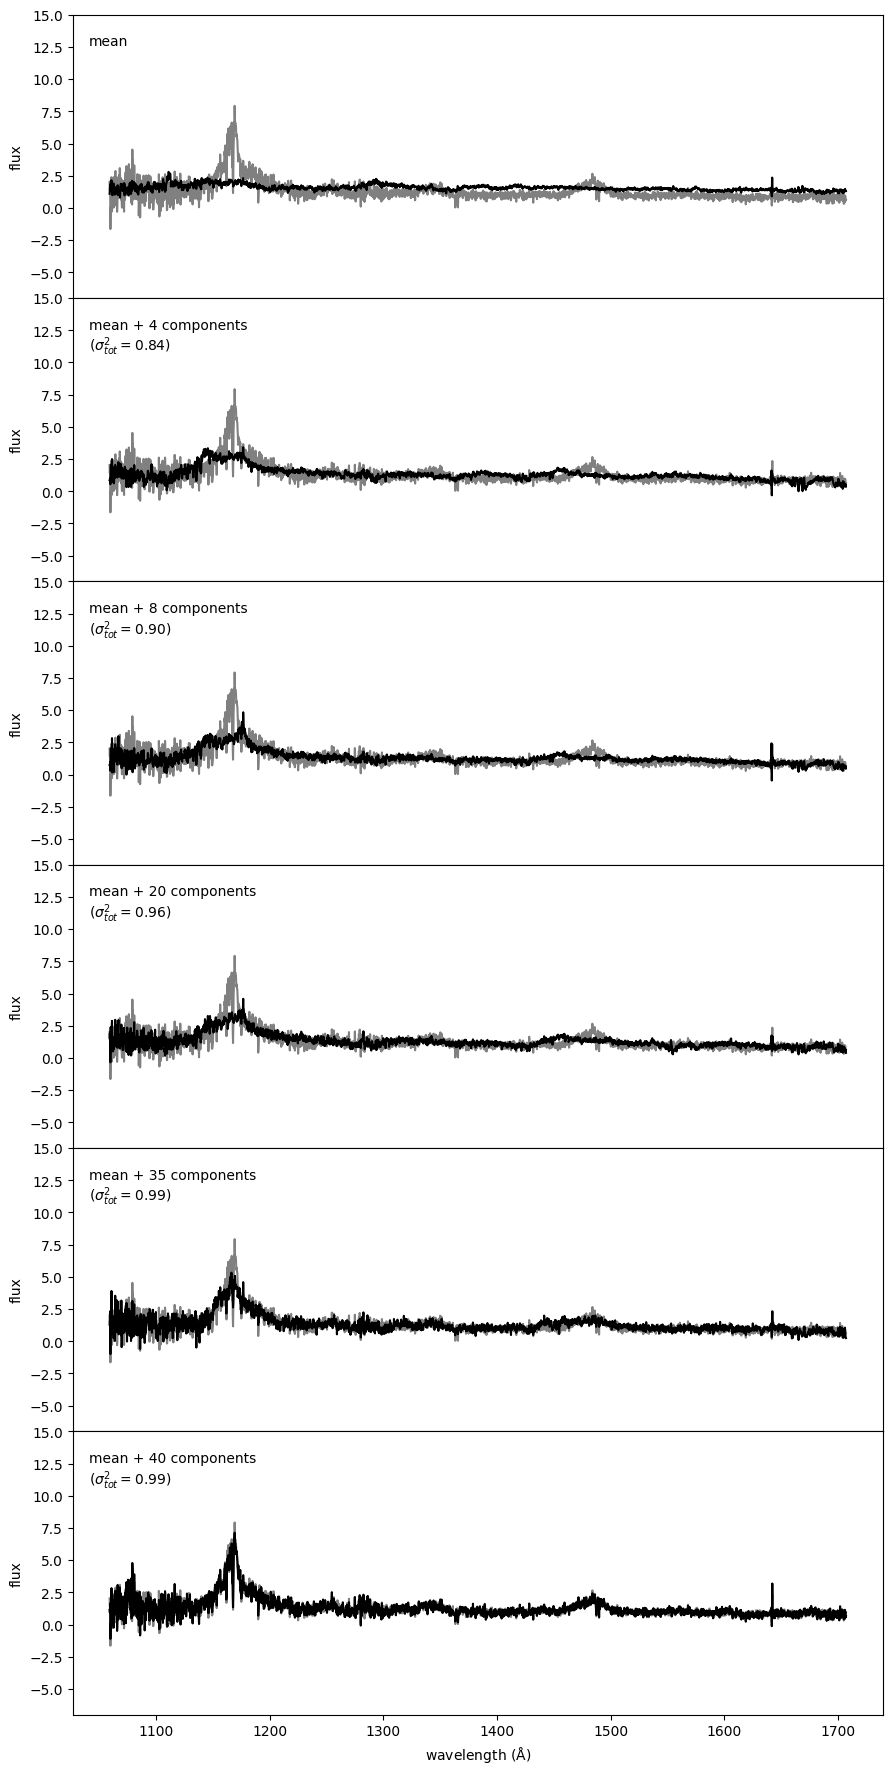

In [82]:
PCA1(bwave_red,Bflux)